# CZ3006 Lab 4 , Ng Chi Hui (U1922243C)

# Preparation

In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as figure
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time


In [2]:
columns = ['Type', 'sflow_agent_address', 'inputPort', 'outputPort', 'src_MAC', 'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan', 'src_IP', 'dst_IP', 'IP_protocol','ip_tos', 'ip_ttl', 'udp_src_port/tcp_ src_port/icmp_type', 'udp_dst_port/tcp_ dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_size', 'sampling_rate', 'TEST']
# Read in and append columns to the data
df = pd.read_csv("Data_2.csv", names=columns)
# Dropping the NaN coloumn
df = df.iloc[:, :-1]
df.head()


,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_ src_port/icmp_type,udp_dst_port/tcp_ dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,193,130,0031466b23cf,00239cd087c1,0x0800,919.0,919,74.125.10.59,137.132.38.238,17,0x00,63,443.0,62758,0x00,1396,1378,2048
1,FLOW,203.30.38.251,193,130,0031466b23cf,00239cd087c1,0x0800,919.0,919,173.194.22.215,137.132.228.29,6,0x00,63,443.0,39740,0x10,1438,1420,2048
2,FLOW,203.30.38.251,199,131,544b8cf9a7df,001cb0c88e40,0x0800,600.0,43,193.62.193.9,202.130.56.153,6,0x00,246,80.0,35794,0x18,272,250,2048
3,FLOW,203.30.38.251,193,131,0031466b23cf,001cb0c88e40,0x0800,919.0,43,74.125.130.132,192.122.131.33,6,0x00,52,443.0,5287,0x10,1418,1400,2048
4,FLOW,203.30.38.251,129,193,00135f21bc80,0031466b23cf,0x0800,11.0,919,155.69.160.69,74.125.68.139,17,0x60,59,48361.0,443,0x00,89,67,2048


# EXERCISE 4A: TOP TALKERS AND LISTENERS

In [3]:
def getOrg(data, type):
    Organisation = []
    data[type]
    count = 0
    for ip in data[type]:
        time.sleep(1)
        if count == 5:
            break
        data = pd.read_json('http://ip-api.com/json/'+str(ip), typ='series')
        Organisation.append(data['org'])
        count += 1
    return Organisation


In [4]:
# TOP 5 TALKERS
df_source_ip_count = df["src_IP"].value_counts().rename_axis("IP Address").reset_index(name="Packets")
df_source_ip_count.index += 1
org = getOrg(df_source_ip_count, "IP Address")
for i in range(5):
    df_source_ip_count.loc[i+1, 'Organisation'] = org[i]
df_source_ip_count.head(5)


,IP Address,Packets,Organisation
1,13.107.4.50,5960,Microsoft Corporation
2,130.14.250.7,4034,National Library of Medicine
3,155.69.160.38,3866,Nanyang Technological University
4,171.67.77.19,2656,Stanford University
5,155.69.199.255,2587,Nanyang Technological University


In [5]:
# TOP 5 LISTENERS
df_destination_ip_count = df["dst_IP"].value_counts().rename_axis('IP Address').reset_index(name='Packets')
df_destination_ip_count.index += 1
org = getOrg(df_destination_ip_count, "IP Address")
for i in range(5):
    df_destination_ip_count.loc[i+1, 'Organisation'] = org[i]
df_destination_ip_count.head(5)


,IP Address,Packets,Organisation
1,137.132.228.33,5908,National University of Singapore
2,192.122.131.36,4662,A*STAR
3,202.51.247.133,4288,Nusgp
4,137.132.228.29,4022,National University of Singapore
5,103.37.198.100,3741,A*STAR


# EXERCISE 4B: TRANSPORT PROTOCOL  


Proportion of TCP and UDP packets

Field: IP Protocol

Note: 6 - TCP, 17 - UDP, 50 - ESP


In [6]:
df_protocol_packets = df["IP_protocol"].value_counts().rename_axis("Header").reset_index(name="Packets")
df_protocol_packets.index += 1
total_packet_count = df["IP_protocol"].count()
df_total = pd.DataFrame({"Header": ["Total"], "Packets": [total_packet_count]})

#Find counts of All, TCP, UDP
df_tcp = df.loc[df['IP_protocol'] == 6]["IP_protocol"].value_counts().rename_axis("Header").reset_index(name='Packets')
df_udp = df.loc[df['IP_protocol'] == 17]["IP_protocol"].value_counts().rename_axis("Header").reset_index(name='Packets')
df_tcp_udp = pd.concat([df_total, df_tcp, df_udp]).reset_index(drop=True)
df_tcp_udp.insert(1, "Protocol", ["All", "TCP", "UDP"])

In [7]:
# Find counts of Others
noTCP = int(df_tcp_udp[df_tcp_udp['Protocol'] == 'TCP']['Packets'])
noUDP = int(df_tcp_udp[df_tcp_udp['Protocol'] == 'UDP']['Packets'])
others = total_packet_count - noTCP - noUDP
df_tcp_udp.loc['3'] = ['Others', 'Others', others]
df_tcp_udp
# Finding Proportion
packet_count = df_tcp_udp["Packets"].values
tcp_proportion = packet_count[1] / total_packet_count * 100
udp_proportion = packet_count[2] / total_packet_count * 100
others_proportion = packet_count[3] / total_packet_count * 100
df_tcp_udp.insert(3, "Proportion (%)", ["100", tcp_proportion, udp_proportion, others_proportion])
df_tcp_udp

,Header,Protocol,Packets,Proportion (%)
0,Total,All,177232,100
1,6,TCP,137707,77.698723
2,17,UDP,36852,20.793085
3,Others,Others,2673,1.508193


# EXERCISE 4C: APPLICATIONS PROTOCOL
 

In [8]:
df_app_protocol_count = df["udp_dst_port/tcp_ dst_port/icmp_code"].value_counts().rename_axis('Port').reset_index(name='Packets')
df_app_protocol_count.index += 1
df_app_protocol_count.sort_values('Packets', ascending=False)

,Port,Packets
1,443,43208
2,80,11018
3,50930,2450
4,15000,2103
5,8160,1354
...,...,...
12785,269838,1
12786,50474,1
12787,39062,1
12788,48244,1


In [9]:
# Trying to match the port numbers with 
tcp_udp_ports = pd.read_csv('service-names-port-numbers.csv')
tcp_udp_ports.iloc[:, [0, 1]].drop_duplicates(subset='Port Number')
tcp_udp_ports = tcp_udp_ports.set_index('Port Number').to_dict()
service = []
count = 0
for port in df_app_protocol_count['Port']:
    if count == 5:
        break
    try:
        data = tcp_udp_ports['Service Name'][str(port)]
    except:
        data = "Unable to Find"
    service.append(data)
    count += 1
# Append data to table
for i in range(5):
    df_app_protocol_count.loc[i+1, 'Services'] = service[i]
df_app_protocol_count.loc[df_app_protocol_count['Port'] == 50930,'Services'] = "Dynamic and/or Private Ports"
df_app_protocol_count.head(5)


,Port,Packets,Services
1,443,43208,https
2,80,11018,http
3,50930,2450,Dynamic and/or Private Ports
4,15000,2103,hydap
5,8160,1354,patrol


# EXERCISE 4D: TRAFFIC

In [10]:
total_traffic = df['IP_size'].sum()
print("Total Traffic: ", total_traffic/10**6, "MB")

Total Traffic:  169.93475 MB


# Additional Information
1. Top 5 communication pair
2. Visualizing the communication between different IP hosts.


## 1. Peak Traffic of Network

## 2. Top 5 Communication Pairs

In [11]:
pairs = df.groupby(['src_IP', 'dst_IP']).size().reset_index(name='No of Times Paired')
pairs['rank'] = pairs['No of Times Paired'].rank(ascending=False)
pairs = pairs.sort_values('No of Times Paired', ascending=False).head(5)
pairs.set_index("rank", inplace=True, drop=True)

srcOrg = getOrg(pairs, "src_IP")
dstOrg = getOrg(pairs, "dst_IP")

#Appending values to sorted table
for i in range(5):
    pairs.loc[i+1, 'Source Organisation'] = srcOrg[i]
    pairs.loc[i+1, 'Destination Organisation'] = dstOrg[i]
pairs.head(5)


,src_IP,dst_IP,No of Times Paired,Source Organisation,Destination Organisation
rank,,,,,
1.0,130.14.250.7,103.37.198.100,3739,National Library of Medicine,A*STAR
2.0,171.67.77.19,192.122.131.36,2656,Stanford University,A*STAR
3.0,129.99.230.54,137.132.22.74,2097,National Aeronautics and Space Administration,National University of Singapore
4.0,137.132.228.42,137.131.17.212,1553,National University of Singapore,The Scripps Research Institute
5.0,155.69.252.133,138.75.242.36,1475,Nanyang Technological University,M1 LIMITED


<AxesSubplot:xlabel='time'>

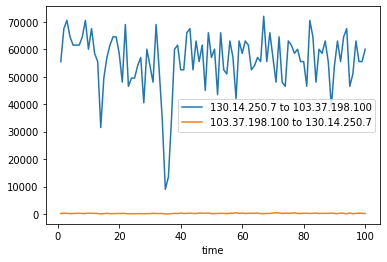

In [12]:
portions = np.array_split(df, 100)
trafficR = pd.DataFrame(columns=['time', '130.14.250.7 to 103.37.198.100'])
for i, portion in enumerate(portions):
    trafficR.loc[i] = [i + 1, portion[(portion.src_IP == '130.14.250.7') & (
    portion.dst_IP == '103.37.198.100')].IP_size.sum()]

trafficL = pd.DataFrame(columns=['time', '103.37.198.100 to 130.14.250.7'])
for i, portion in enumerate(portions):
    trafficL.loc[i] = [i + 1, portion[(portion.src_IP == '103.37.198.100') & (
        portion.dst_IP == '130.14.250.7')].IP_size.sum()]

ax = trafficR.plot(x='time', y='130.14.250.7 to 103.37.198.100')
trafficL.plot(x='time', y='103.37.198.100 to 130.14.250.7', ax=ax)


## Peak Traffic of Network

123.136.64.7
402
155.69.199.255
413
155.69.160.78
398


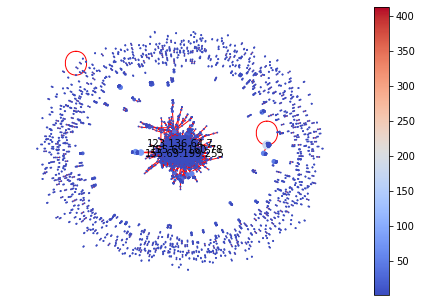

In [13]:
# Network Graph Visualization of src_IP to dst_IP
graph = nx.Graph()
graph = nx.from_pandas_edgelist(df, 'src_IP', 'dst_IP')

d = dict(graph.degree)
degrees = graph.degree()
nodes = graph.nodes()
maximum = d[max(d, key=d.get)]
minimum = d[min(d, key=d.get)]
n_color = np.asarray([degrees[n]/maximum * 20 for n in nodes])
cmap = plt.cm.coolwarm
# only label nodes with degree > 100
labels = {
    n: (n
        if d[n] > 390
        else '')
    for n in nodes
}

for n in nodes:
    if d[n] > 390:
        print(n)
        print(d[n])

nx.draw_spring(graph, node_size=[(v+1)/maximum * 150 for v in d.values()], node_color=n_color,
               cmap=cmap, with_labels=True, labels=labels, edge_color='red', font_size=10)

sm = plt.cm.ScalarMappable(
    cmap=cmap, norm=plt.Normalize(vmin=minimum, vmax=maximum))
sm._A = []
plt.colorbar(sm)
plt.show()


In [14]:
Astar = df[df.src_IP == '123.136.64.7']["udp_dst_port/tcp_ dst_port/icmp_code"].value_counts(
).rename_axis('Destination Port').reset_index(name='Packets')
Astar['Percent'] = 100 * Astar['Packets'] / Astar['Packets'].sum()
Astar.head()

,Destination Port,Packets,Percent
0,443,832,62.275449
1,80,224,16.766467
2,52336,97,7.260479
3,49174,82,6.137725
4,35042,21,1.571856


In [15]:
NTU = df[df.src_IP == '155.69.199.255']["udp_dst_port/tcp_ dst_port/icmp_code"].value_counts(
).rename_axis('Dest Port').reset_index(name='Packets')
NTU['Percent'] = 100 * NTU['Packets'] / NTU['Packets'].sum()
NTU.head()

,Dest Port,Packets,Percent
0,443,1453,56.165443
1,993,506,19.559335
2,80,323,12.485504
3,7273,135,5.218400
4,8080,100,3.865481


In [16]:
total_df = df_source_ip_count.append(df_destination_ip_count).groupby(
    'IP Address', as_index=False).sum().sort_values(by=['Packets'], ascending=False)
primary_IP = total_df['IP Address'].iloc[0]
primary_IP

'192.122.131.36'

In [17]:
# anomaly detection using a sliding mean window (+/- value*sd)
def plot_with_anomalies(df_row, title, window, sd):
    if 'y' in df_row:
        df_row.drop(['y'], inplace=True)

    r_mean = df_row.rolling(window=window).mean().shift()  # rolling mean

    # rolling standard deviation
    r_sd = df_row.rolling(window=window).std().shift()
    upper = r_mean+sd*r_sd  # upper bound = rolling mean + constant
    lower = r_mean-sd*r_sd  # lower bound = rolling mean - constant
    with np.errstate(invalid='ignore'):
        mask = np.logical_or(np.array(upper[:]) < np.array(df_row[:]),
                             np.array(df_row[:]) < np.array(lower[:])) 
    plt.figure(figsize=(14, 7))
    plt.xticks(np.arange(0, len(df_row)+1, 10))  # set x tick frequency
    plt.plot(df_row.index, r_mean, lw=1, alpha=0.8,
             label='Rolling mean', color='blue')  # plot rolling mean
    plt.fill_between(df_row.index, lower, upper, color='b',
                     alpha=.1)  # plot confidence band
    plt.plot(df_row, lw=2, alpha=0.8, label='Actual',
             color='red')  # plot actuals
    plt.plot(df_row[mask], 'ro', label="Anomaly")  # plot anomalies
    plt.xlabel('Time (ms)')
    plt.ylabel('Traffic', rotation=0)
    plt.title(title)




In [18]:
# split dataframe into seperate 'chunks' and sum the relevant data
total_time = 15  # total time in seconds
time_per_chunk = 0.1  # chunk size in seconds
N = total_time//time_per_chunk

groups = np.array_split(df, 150)
sum_out = pd.Series(
    list(map(lambda x: x[x['src_IP'] == primary_IP]['IP_size'].sum(), groups)))
sum_in = pd.Series(
    list(map(lambda x: x[x['dst_IP'] == primary_IP]['IP_size'].sum(), groups)))

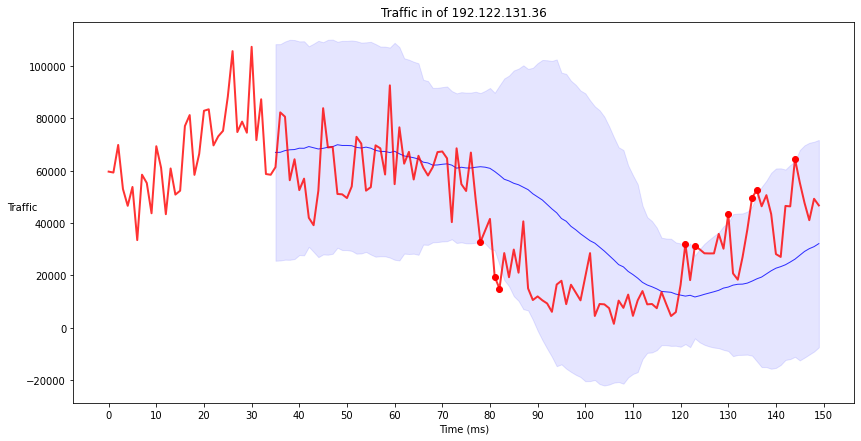

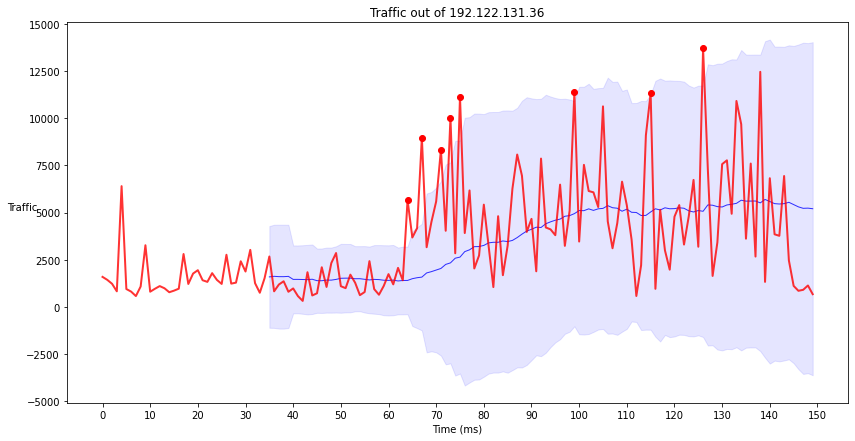

In [19]:
plot_with_anomalies(sum_in, "Traffic in of " + primary_IP, window=35, sd=2.5)
plot_with_anomalies(sum_out, "Traffic out of " + primary_IP, window=35, sd=2.5)


In [20]:
#Print anomaly
def anomaly_detect(df_row, window, sd):
    if 'y' in df_row: 
        df_row.drop(['y'], inplace=True)

    r_mean = df_row.rolling(window=window).mean().shift()  # rolling mean
    # rolling standard deviation
    r_sd = df_row.rolling(window=window).std().shift()
    upper = r_mean+sd*r_sd  # upper bound = rolling mean + confidence*sd
    lower = r_mean-sd*r_sd  # lower bound = rolling mean - confidence*sd

    with np.errstate(invalid='ignore'):
        mask = np.logical_or(np.array(upper[:]) < np.array(df_row[:]),  
                             np.array(df_row[:]) < np.array(lower[:]))

    anomalies = df_row[mask] 
    indexes = df_row.index[mask == True].tolist()
    return indexes


In [21]:
print("Traffic in - anomalies:")
row = anomaly_detect(sum_in, window=35, sd=2.5)
print()
count = 0
for i in row:
    print("Time frame", i, "ms: ")
    match = groups[i].loc[df['dst_IP'] == primary_IP, ['src_IP']]
    print(match)
print("Traffic out - anomalies:")
row = anomaly_detect(sum_out, window=30, sd=2.5)
print()
count = 0
for i in row:
    print("Time frame", i, "ms: ")
    match = groups[i].loc[df['src_IP'] == primary_IP, ['dst_IP']]
    print(match)

Traffic in - anomalies:

Time frame 78 ms: 
               src_IP
92296    171.67.77.19
92321   74.125.68.190
92324   74.125.68.190
92364    171.67.77.19
92424    171.67.77.19
92477    171.67.77.19
92487   74.125.68.190
92515    171.67.77.19
92524    171.67.77.19
92648   74.125.68.190
92698   74.125.68.190
92748    171.67.77.19
92789    171.67.77.19
92899   74.125.68.190
92901   74.125.68.190
92959    171.67.77.19
92967  209.85.229.252
92988   74.125.68.190
93110    171.67.77.19
93178    171.67.77.19
93216    171.67.77.19
93242    171.67.77.19
Time frame 81 ms: 
               src_IP
95742    171.67.77.19
95814   74.125.68.190
95822   74.125.68.190
95855    171.67.77.19
95911  209.85.229.252
96245    171.67.77.19
96356    171.67.77.19
96429    171.67.77.19
96541    171.67.77.19
96703    171.67.77.19
96722    171.67.77.19
96833  209.85.229.215
96923    171.67.77.19
Time frame 82 ms: 
               src_IP
96984    171.67.77.19
97148    171.67.77.19
97176    171.67.77.19
97229  173.194.2